In [94]:
import pandas as pd
import numpy as np

In [95]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [96]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
x_train=df_train.drop(["SalePrice"],axis=1)
y_train=df_train["SalePrice"]

In [98]:
y_train_log=np.log1p(y_train)

In [ ]:
x_train=x_train.drop("Id",axis=1)


In [100]:
numerical=x_train.select_dtypes(include='number').columns
categorical=x_train.select_dtypes(include='object').columns

In [101]:
x_train[numerical]=x_train[numerical].fillna(x_train[numerical].median())


In [102]:
x_train[numerical].isnull().sum().sum()

np.int64(0)

In [103]:
for cat in categorical:
    x_train[cat]=x_train[cat].fillna(x_train[cat].mode()[0])

In [104]:
x_train[categorical].isnull().sum().sum()

np.int64(0)

In [106]:
# Lets handle the outliers
for col in numerical:
    upper_bound=x_train[col].quantile(0.99)
    lower_bound=x_train[col].quantile(0.01)
    x_train[col]=np.where(x_train[col]<lower_bound,lower_bound,x_train[col])
    x_train[col]=np.where(x_train[col]>upper_bound,upper_bound,x_train[col])

In [107]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train[numerical]=std.fit_transform(X=x_train[numerical])

In [108]:
x_train[numerical].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.0,1.460000e+03,1.460000e+03,1.460000e+03
mean,-8.455945e-17,2.628035e-16,1.216683e-17,-1.703356e-16,4.866731e-18,-5.601607e-15,1.596288e-15,2.920039e-17,-2.238696e-16,-1.216683e-17,...,-3.041707e-16,1.460019e-16,1.280559e-16,2.676702e-17,7.300097e-18,6.691755e-18,0.0,2.920039e-17,7.543433e-17,3.567436e-14
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,0.0,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.475636e+00,-1.656536e+00,-2.267470e+00,-2.348889e+00,-2.424258e+00,-1.689571e+00,-6.000802e-01,-1.022448e+00,-2.995967e-01,...,-2.256608e+00,-7.713365e-01,-7.395518e-01,-3.672717e-01,-1.264963e-01,-2.789887e-01,0.0,-1.858129e-01,-1.969111e+00,-1.367655e+00
25%,-8.725628e-01,-4.832625e-01,-4.958945e-01,-8.065228e-01,-5.281416e-01,-5.844214e-01,-8.656653e-01,-6.000802e-01,-1.022448e+00,-2.995967e-01,...,-6.555516e-01,-7.713365e-01,-7.395518e-01,-3.672717e-01,-1.264963e-01,-2.789887e-01,0.0,-1.858129e-01,-4.891101e-01,-6.144386e-01
50%,-1.631095e-01,-2.348404e-02,-1.155022e-01,-7.604930e-02,-5.281416e-01,5.324541e-02,4.428908e-01,-6.000802e-01,-1.283049e-01,-2.995967e-01,...,4.087189e-02,-7.713365e-01,-3.360914e-01,-3.672717e-01,-1.264963e-01,-2.789887e-01,0.0,-1.858129e-01,-1.191097e-01,1.387775e-01
75%,3.098594e-01,4.873809e-01,3.040161e-01,6.544242e-01,3.822324e-01,9.594036e-01,9.275412e-01,3.795383e-01,6.381868e-01,-2.995967e-01,...,5.003678e-01,6.197210e-01,3.578606e-01,-3.672717e-01,-1.264963e-01,-2.789887e-01,0.0,-1.858129e-01,6.208910e-01,8.919936e-01
max,3.147673e+00,3.471343e+00,5.435091e+00,2.845845e+00,3.113354e+00,1.261456e+00,1.169866e+00,4.119265e+00,2.643679e+00,5.302957e+00,...,2.543162e+00,3.413925e+00,3.873131e+00,4.105663e+00,8.304757e+00,4.940899e+00,0.0,6.490491e+00,2.100892e+00,1.645210e+00


In [109]:
x_train=pd.get_dummies(x_train,columns=categorical,drop_first=True,dtype=int)

In [110]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
 

In [134]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.227830,-0.318740,0.654424,-0.528142,1.060088,0.879076,0.568901,0.623615,-0.299597,...,0,0,0,0,1,0,0,0,1,0
1,-0.872563,0.538467,-0.091493,-0.076049,2.202980,0.153930,-0.429480,-0.600080,1.257792,-0.299597,...,0,0,0,0,1,0,0,0,1,0
2,0.073375,-0.074571,0.234557,0.654424,-0.528142,0.992965,0.830611,0.366119,0.110677,-0.299597,...,0,0,0,0,1,0,0,0,1,0
3,0.309859,-0.483263,-0.101373,0.654424,-0.528142,-1.893317,-0.720270,-0.600080,-0.518837,-0.299597,...,0,0,0,0,1,0,0,0,0,0
4,0.073375,0.742813,0.829353,1.384898,-0.528142,0.959404,0.733681,1.487387,0.504707,-0.299597,...,0,0,0,0,1,0,0,0,1,0


In [111]:
xg=XGBRegressor()
xg.fit(x_train,y_train_log)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [112]:
xg.score(x_train,y_train_log)

0.9994794433363475

In [113]:
from sklearn.model_selection import cross_val_score,  cross_validate
from sklearn.metrics import mean_squared_log_error,mean_squared_error, make_scorer
from lightgbm import LGBMRegressor

def neg_rmse_log(y_true_log, y_pred_log):
    return -np.sqrt(mean_squared_error(y_true_log, y_pred_log))

final_log_scorer = make_scorer(neg_rmse_log, greater_is_better=True)

scoring = {
    "RMSLE": final_log_scorer,
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}
cv_results = cross_validate(
        xg,
        x_train,
        y_train_log,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )
for metric in scoring.keys():
    # Convert back to positive for interpretability
# We display the mean RMSLE (by dropping the negative sign)
    scores = cv_results[f'test_{metric}']
    if metric == "R2":
        print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")
    else:
        print(f"{metric}: {-scores.mean():.5f} ± {scores.std():.5f}")
    

RMSLE: 0.14401 ± 0.00806
MAE: 0.09784 ± 0.00351
RMSE: 0.14401 ± 0.00806
R2: 0.8695 ± 0.0067


In [65]:
from sklearn.model_selection import RandomizedSearchCV
targeted_xgb_params = {

    "n_estimators": [1000, 1500, 2000],
    "learning_rate": [0.01, 0.03, 0.05],
    
    # Increase Complexity (Reduce Bias)
    "max_depth": [5, 7, 10],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3],
    
    # Reduce Regularization
    "reg_lambda": [1, 5, 10],
    
    # Randomness
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# --- Define the RandomizedSearchCV Object ---
# Increased n_iter to 20 for a better chance of finding the global optimum
# over this wider-but-more-relevant parameter space.

xgb_random_optimized = RandomizedSearchCV(
    estimator=xg,
    param_distributions=targeted_xgb_params,
    scoring=final_log_scorer,
    cv=5,
    random_state=42,
    n_iter=20, # Increased iterations for better search
    n_jobs=-1,
)

In [114]:
xgb_random_optimized.fit(x_train,y_train_log)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.03, ...], 'max_depth': [5, 7, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",make_scorer(n...hod='predict')
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies th

In [115]:
xgb_random_optimized.best_score_

np.float64(-0.1267123346287677)

In [116]:
lgb=LGBMRegressor()
lgb.fit(x_train,y_train_log)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [117]:
targeted_lgbm_params = {
    "model__n_estimators": [1000, 2000, 3000],  
    "model__learning_rate": [0.01, 0.03, 0.05], 
    "model__num_leaves": [15, 31, 50, 80],      
    "model__max_depth": [5, 7, 10],             
    "model__min_child_samples": [5, 10, 20],  
    "model__reg_alpha": [0, 0.5, 1],            
    "model__reg_lambda": [0, 0.5, 1],           
    'model__subsample': [0.7, 0.8, 0.9],         
    'model__colsample_bytree': [0.7, 0.8, 0.9],  
}

# --- Define the RandomizedSearchCV Object ---
lgb_random_optimized = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=targeted_lgbm_params,
    scoring=final_log_scorer,
    cv=5,
    random_state=42,
    n_iter=50, 
    n_jobs=-1,
)

In [118]:
lgb_random_optimized.fit(x_train,y_train_log)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMRegressor()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__colsample_bytree': [0.7, 0.8, ...], 'model__learning_rate': [0.01, 0.03, ...], 'model__max_depth': [5, 7, ...], 'model__min_child_samples': [5, 10, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",make_scorer(n...hod='predict')
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-va

In [119]:
lgb_random_optimized.best_score_

np.float64(-0.1312424584609253)

In [120]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
st=StackingRegressor(estimators=[("lgb",lgb_random_optimized.best_estimator_),
                                 ("xg_Reg",xgb_random_optimized.best_estimator_)],final_estimator=Ridge(),cv=4,n_jobs=-1)

In [121]:
st.fit(x_train,y_train_log)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('lgb', ...), ('xg_Reg', ...)]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",Ridge()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",4
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",-1
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100


In [122]:

cv_results = cross_validate(
        st,
        x_train,
        y_train_log,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )
for metric in scoring.keys():
    # Convert back to positive for interpretability
# We display the mean RMSLE (by dropping the negative sign)
    scores = cv_results[f'test_{metric}']
    if metric == "R2":
        print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")
    else:
        print(f"{metric}: {-scores.mean():.5f} ± {scores.std():.5f}")

RMSLE: 0.12634 ± 0.01042
MAE: 0.08488 ± 0.00323
RMSE: 0.12634 ± 0.01042
R2: 0.8996 ± 0.0093


In [123]:
from sklearn.svm import SVR
sv=SVR()


In [124]:
sv.fit(x_train,y_train_log)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [125]:

cv_results = cross_validate(
        sv,
        x_train,
        y_train_log,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )
for metric in scoring.keys():
    # Convert back to positive for interpretability
# We display the mean RMSLE (by dropping the negative sign)
    scores = cv_results[f'test_{metric}']
    if metric == "R2":
        print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")
    else:
        print(f"{metric}: {-scores.mean():.5f} ± {scores.std():.5f}")

RMSLE: 0.13775 ± 0.00933
MAE: 0.09235 ± 0.00395
RMSE: 0.13775 ± 0.00933
R2: 0.8804 ± 0.0106


In [126]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
st=StackingRegressor(estimators=[("lgb",lgb_random_optimized.best_estimator_),
                                 ("xg_Reg",xgb_random_optimized.best_estimator_),
                                 ("svr",sv)],final_estimator=Ridge(),cv=4,n_jobs=-1)

In [127]:
st.fit(x_train,y_train_log)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('lgb', ...), ('xg_Reg', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",Ridge()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",4
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",-1
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100


In [128]:
st.score(x_train,y_train_log)

0.9850144875124758

In [135]:
import joblib
import os

filename_joblib = 'final_test_model.joblib'

# Save the model
joblib.dump(st, filename_joblib)

print(f"Model successfully saved to {os.path.abspath(filename_joblib)}")


Model successfully saved to c:\Users\lenovo T460s\Desktop\house price pred 2\final_test_model.joblib


In [129]:

cv_results = cross_validate(
        st,
        x_train,
        y_train_log,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )
for metric in scoring.keys():
    # Convert back to positive for interpretability
# We display the mean RMSLE (by dropping the negative sign)
    scores = cv_results[f'test_{metric}']
    if metric == "R2":
        print(f"{metric}: {scores.mean():.4f} ± {scores.std():.4f}")
    else:
        print(f"{metric}: {-scores.mean():.5f} ± {scores.std():.5f}")

RMSLE: 0.12421 ± 0.00985
MAE: 0.08355 ± 0.00329
RMSE: 0.12421 ± 0.00985
R2: 0.9029 ± 0.0088


In [131]:
df_test=df_test.drop("Id",axis=1)
numerical=df_test.select_dtypes(include='number').columns
categorical=df_test.select_dtypes(include='object').columns
df_test[numerical]=df_test[numerical].fillna(df_test[numerical].median())
for cat in categorical:
    df_test[cat]=df_test[cat].fillna(df_test[cat].mode()[0])
for col in numerical:
    upper_bound=df_test[col].quantile(0.99)
    lower_bound=df_test[col].quantile(0.01)
    df_test[col]=np.where(df_test[col]<lower_bound,lower_bound,df_test[col])
    df_test[col]=np.where(df_test[col]>upper_bound,upper_bound,df_test[col])
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_test[numerical]=std.fit_transform(X=df_test[numerical])
df_test=pd.get_dummies(df_test,columns=categorical,drop_first=True,dtype=int)

In [ ]:
ID=np.arange(1461,2920)
final=np.vstack(([ID],[y_pred]))
finaldf=pd.DataFrame(final)
finaldf=finaldf.T
finaldf=finaldf.rename(columns={0:"ID",1:"SalePrice"})
finaldf["ID"]=finaldf["ID"].astype("int32")
finaldf.to_csv("submission2.csv",index=False)

In [ ]:
class year_handling(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X=X.copy()
        X["House_age"]=X["YrSold"]-X["YearBuilt"]
        X["Year_since_remodel"]=X["YrSold"]-X["YearRemodAdd"]
        X["Garage_age"] = X["YrSold"] - X["GarageYrBlt"]
        X['IsNew']      = (X['YrSold'] == X['YearBuilt']).astype(int)
        X['HasRemodel'] = (X['YearBuilt'] != X['YearRemodAdd']).astype(int)
        X['House_age'] = np.maximum(0, X['House_age'])
        X['Year_since_remodel'] = np.maximum(0, X['Year_since_remodel'])
        
        cols_to_drop=["YrSold","YearBuilt","YearRemodAdd","GarageYrBlt",'Id',"BsmtExposure"]

        X=X.drop(columns=[i for i in cols_to_drop if i in X.columns])
        return X

In [ ]:
from sklearn.base import TransformerMixin,BaseEstimator
class Outliercapping(BaseEstimator,TransformerMixin):
    def __init__(self,feature_list,lower_quantile=0.01,upper_quantile=0.99):
        self.feature_list = feature_list
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        self.bounds = {}

    def fit(self,X,y=None):
        for col in self.feature_list:
            self.bounds[col] = (
                X[col].quantile(self.lower_quantile),
                X[col].quantile(self.upper_quantile))
        return self
    
    def transform(self,X):
        X= X.copy()
        for col in self.feature_list:
            lower, upper = self.bounds[col]
            # Use np.clip to cap the values
            X[col] = np.clip(X[col], lower, upper)
        return X
        

Rule: Remove a row if a feature value is outside $Q1 - (3.0 \times \text{IQR})$ or $Q3 + (3.0 \times \text{IQR})$.

In [ ]:
class ExtremeOutlierHandling(BaseEstimator,TransformerMixin):
    def __init__(self,feature_list,k=3):
        self.feature_list=feature_list
        self.k=k
        self.bound={}

    def fit(self,X,y=None):
        for col in self.feature_list:
            Q1=X[col].quantile(0.25)
            Q3=X[col].qunatile(0.75)
            IQR=Q3-Q1
            self.bounds[col]={"lower":Q1-(self.k*IQR),
                              "upper":Q3+(self.k*IQR)}
        return self
    def transform(self,X):
        X_=X.copy
        mask = pd.Series(True, index=X_.index)
        
        for col in self.feature_list:
            lower = self.bounds[col]['lower']
            upper = self.bounds[col]['upper']
            outlier_mask = (X_[col] < lower) | (X_[col] > upper)
            
            # Combine masks: if a row is an outlier in ANY of the specified columns, it is marked for removal
            mask = mask & (~outlier_mask)
        print(f"Removed {len(X) - len(X_[mask])} extreme outlier rows.")
        return X_[mask]



C:\Users\lenovo T460s\AppData\Local\Temp\ipykernel_15972\1182890581.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
C:\Users\lenovo T460s\AppData\Local\Temp\ipykernel_15972\1182890581.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
C:\Users\lenovo T460s\AppData\Local\Temp\ipykernel_15972\1182890581.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
C:\Users\lenovo T460s\AppData\Local\Temp\ipykernel_15972\1182890581.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
C:\Users\lenovo T460s\AppData\Local\Temp\ipykernel_15972\1182890581.

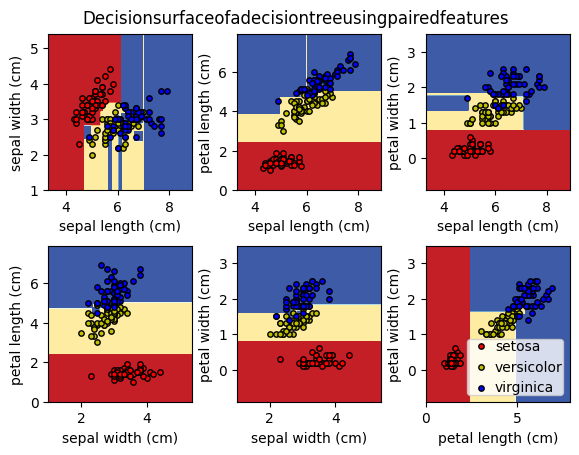

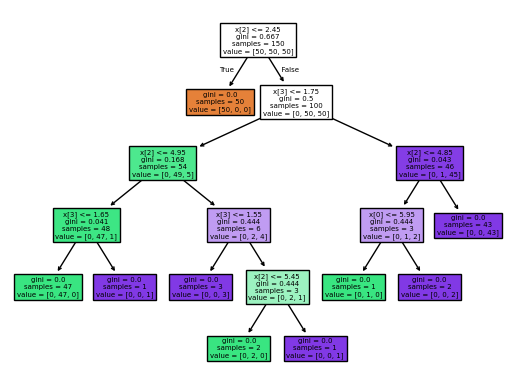

In [141]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
# Load data
iris = load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
[1, 2], [1, 3], [2, 3]]):
# We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
    np.arange(y_min,y_max,plot_step))
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    #Plotthetrainingpoints
    for i,color in zip(range(n_classes),plot_colors):
        idx =np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],
        cmap=plt.cm.RdYlBu,edgecolor='black',s=15)
plt.suptitle("Decisionsurfaceofadecisiontreeusingpairedfeatures")
plt.legend(loc='lower right',borderpad=0,handletextpad=0)
plt.axis("tight")
plt.figure()
clf=DecisionTreeClassifier().fit(iris.data,iris.target)
plot_tree(clf,filled=True)
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

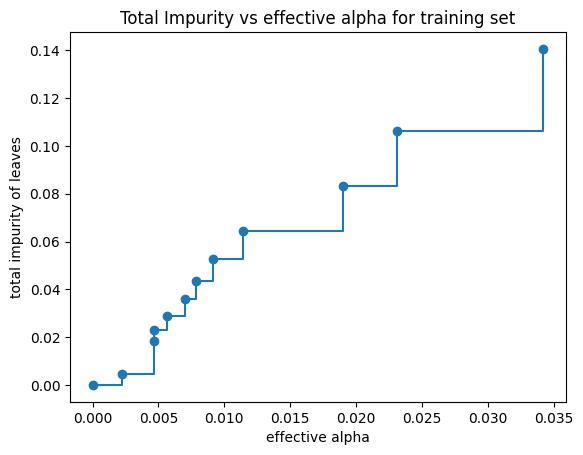

In [142]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [143]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


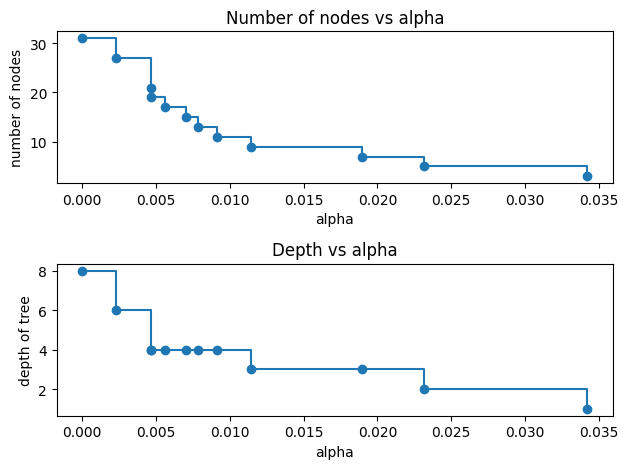

In [144]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

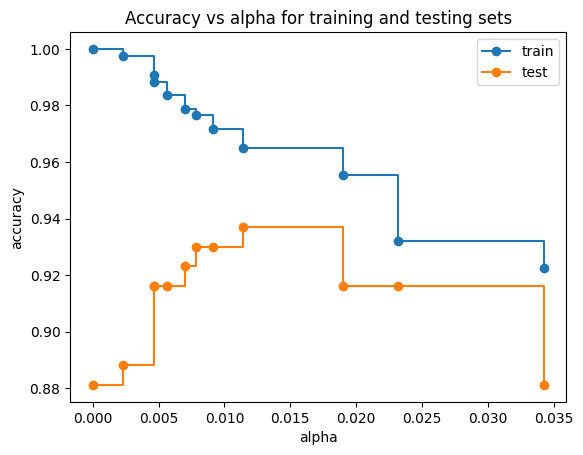

In [145]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
drawstyle="steps-post")
ax.legend()
plt.show()

In [147]:

from sklearn.datasets import load_iris
#fromsklearn.treeimportDecisionTreeClassifier
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
estimator=DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
estimator.fit(X_train,y_train)
#Thedecisionestimatorhasanattributecalledtree_ whichstorestheentire
#treestructureandallowsaccesstolowlevelattributes.Thebinarytree
#tree_isrepresentedasanumberofparallelarrays.Thei-thelementofeach
#arrayholdsinformationaboutthe node`i`.Node0isthetree'sroot.NOTE:
#Someofthearraysonlyapplytoeitherleavesorsplitnodes,resp.Inthis
#casethevaluesofnodesofthe othertypearearbitrary!
#
#Amongthosearrays,wehave:
#-left_child,idoftheleftchildofthenode
#-right_child,idoftherightchildofthenode
#-feature,featureusedforsplittingthenode
#-threshold,thresholdvalueat thenode
#
#Usingthosearrays,wecanparsethetreestructure:
n_nodes=estimator.tree_.node_count
children_left=estimator.tree_.children_left
children_right=estimator.tree_.children_right
feature=estimator.tree_.feature
threshold=estimator.tree_.threshold
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0,-1)] # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
print("The binary tree structure has %s nodes and has "
"the following tree structure:"
% n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        "node %s."
        % (node_depth[i] * "\t",
        i,
        children_left[i],
        feature[i],
        threshold[i],
        children_right[i],
        ))
print()
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.
node_indicator = estimator.decision_path(X_test)
# Similarly, we can also have the leaves ids reached by each sample.
leave_id = estimator.apply(X_test)
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
node_indicator.indptr[sample_id + 1]]
print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
    % (node_id,
    sample_id,
    feature[node_id],
    X_test[sample_id, feature[node_id]],
    threshold_sign,
    threshold[node_id]))
    # For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
len(sample_ids))
common_node_id = np.arange(n_nodes)[common_nodes]
print("\nThe following samples %s share the node %s in the tree"
% (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.950000047683716)

The following samples [0, 1] share the node [0 2] in the tree
It is 40.0 % of all nodes.


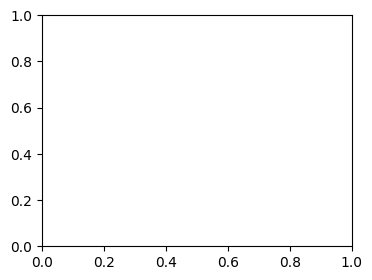

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
np.random.seed(5)
centers = [[1, 1], [-1,-1], [1,-1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
    X[y == label, 1].mean() + 1.5,
    X[y == label, 2].mean(), name,
    horizontalalignment='center',
    bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()